# Jesús Julián Madrid castro A00227101
# K-means clustering

The notebook aims to study and implement a k-means clustering. The iris dataset will be used to identify clusters automatically.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan


# Importing libraries

In [208]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [209]:
# url string that hosts our .csv file
# url string that hosts our .csv file
url = "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
dataset = pd.read_csv(url, names= ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Class'])


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [210]:
dataset.shape

(150, 5)

2. Drop rows with any missing values

In [211]:
dataset =dataset.dropna()
dataset.head(15)

,Sepal_length,Sepal_width,Petal_length,Petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


3. Encoding the class label categorical column: from string to num


In [212]:
# Encoding the categorical column
dataset = dataset.replace({"Class":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
dataset


,Sepal_length,Sepal_width,Petal_length,Petal_width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


4. Discard columns that won't be used


In [213]:
# Drop out non necesary columns
dataset.drop(["Sepal_length","Sepal_width"],axis='columns',inplace=True)

#Visualize the dataset
dataset

,Petal_length,Petal_width,Class
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


5. Scatter plot of the data

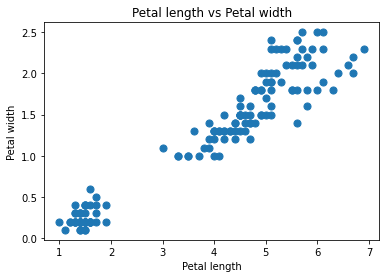

In [214]:
plt.scatter(dataset.Petal_length,dataset.Petal_width, s=50)
plt.title('Petal length vs Petal width')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

<function matplotlib.pyplot.show(close=None, block=None)>

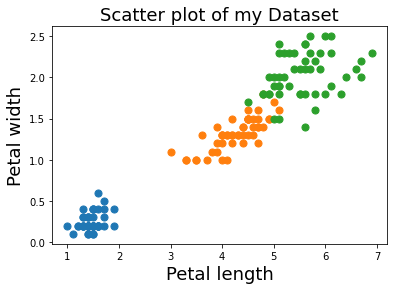

In [215]:
df1= dataset[dataset.Class==0]
df2= dataset[dataset.Class==1]
df3= dataset[dataset.Class==2]

plt.scatter(df1.Petal_length, df1.Petal_width, s=50)
plt.scatter(df2.Petal_length, df2.Petal_width, s=50)
plt.scatter(df3.Petal_length, df3.Petal_width, s=50)

plt.title("Scatter plot of my Dataset", fontsize=18)
plt.xlabel("Petal length", fontsize=18)
plt.ylabel("Petal width", fontsize=18)

plt.show

So, for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [216]:
from sklearn.cluster import KMeans

K = 3

#crear objeto para hacer kmeans y definir el numero de clusters
km= KMeans(n_clusters= K)


#Do kmeans
clusters = km.fit_predict(dataset[["Petal_length","Petal_width"]])

clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [217]:
dataset["cluster1"]=clusters
dataset

,Petal_length,Petal_width,Class,cluster1
0,1.4,0.2,0,1
1,1.4,0.2,0,1
2,1.3,0.2,0,1
3,1.5,0.2,0,1
4,1.4,0.2,0,1
...,...,...,...,...
145,5.2,2.3,2,0
146,5.0,1.9,2,0
147,5.2,2.0,2,0
148,5.4,2.3,2,0


In [218]:
km.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

<function matplotlib.pyplot.show(close=None, block=None)>

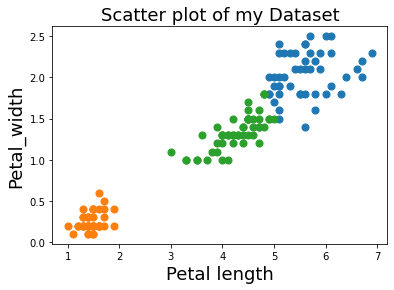

In [219]:
df1= dataset[dataset.cluster1==0]
df2= dataset[dataset.cluster1==1]
df3= dataset[dataset.cluster1==2]

plt.scatter(df1.Petal_length, df1.Petal_width, s=50)
plt.scatter(df2.Petal_length, df2.Petal_width, s=50)
plt.scatter(df3.Petal_length, df3.Petal_width, s=50)

plt.title("Scatter plot of my Dataset", fontsize=18)
plt.xlabel("Petal length", fontsize=18)
plt.ylabel("Petal_width", fontsize=18)

plt.show

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [220]:
sse =[]
k_rng=range(1,10)
for k in k_rng:
    km =KMeans(n_clusters=k)
    km.fit_predict(dataset[["Petal_length","Petal_width"]])
    sse.append(km.inertia_)
    
print(k_rng)
print(sse)  

range(1, 10)
[550.8953333333333, 86.39021984551391, 31.371358974358966, 19.48300089968511, 13.91690875790876, 11.070652341896283, 9.209557208237984, 7.669666305916308, 6.5415844614322864]


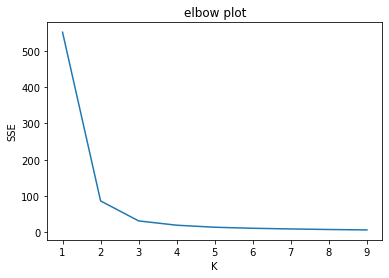

In [221]:
plt.plot(k_rng,sse)

plt.title("elbow plot")
plt.xlabel("K")
plt.ylabel("SSE")

plt.show()

<span style='color:Blue'> **Important remarks**  </span>

According to the Elbot plot, the selected K agree with the real number of clusters



# Normalizing the data: preprocessing using min max scaler

Normalizing the data: preprocessing using min max scaler

In [222]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(dataset[['Petal_length']])
dataset['Petal_length'] = scaler.transform(dataset[['Petal_length']])

scaler.fit(dataset[['Petal_width']])
dataset['Petal_width'] = scaler.transform(dataset[['Petal_width']])

dataset

,Petal_length,Petal_width,Class,cluster1
0,0.067797,0.041667,0,1
1,0.067797,0.041667,0,1
2,0.050847,0.041667,0,1
3,0.084746,0.041667,0,1
4,0.067797,0.041667,0,1
...,...,...,...,...
145,0.711864,0.916667,2,0
146,0.677966,0.750000,2,0
147,0.711864,0.791667,2,0
148,0.745763,0.916667,2,0


In [223]:
dataset.describe()

,Petal_length,Petal_width,Class,cluster1
count,150.000000,150.000000,150.000000,150.000000
mean,0.467458,0.458056,1.000000,1.026667
std,0.299203,0.317599,0.819232,0.818795
min,0.000000,0.000000,0.000000,0.000000
25%,0.101695,0.083333,0.000000,0.000000
50%,0.567797,0.500000,1.000000,1.000000
75%,0.694915,0.708333,2.000000,2.000000
max,1.000000,1.000000,2.000000,2.000000


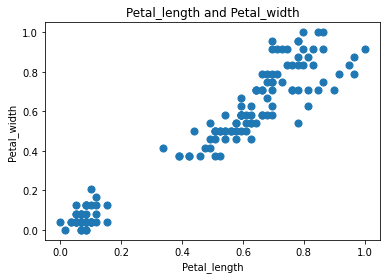

In [224]:
plt.scatter(dataset.Petal_length,dataset.Petal_width, s=50)
plt.title('Petal_length and Petal_width')
plt.xlabel('Petal_length')
plt.ylabel('Petal_width')
plt.show()


In [225]:
K = 3

#crear objeto para hacer kmeans y definir el numero de clusters
km= KMeans(n_clusters= K)


#Do kmeans
clusters = km.fit_predict(dataset[["Petal_length","Petal_width"]])

clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [226]:
dataset["cluster2"]=clusters
dataset

,Petal_length,Petal_width,Class,cluster1,cluster2
0,0.067797,0.041667,0,1,0
1,0.067797,0.041667,0,1,0
2,0.050847,0.041667,0,1,0
3,0.084746,0.041667,0,1,0
4,0.067797,0.041667,0,1,0
...,...,...,...,...,...
145,0.711864,0.916667,2,0,2
146,0.677966,0.750000,2,0,2
147,0.711864,0.791667,2,0,2
148,0.745763,0.916667,2,0,2


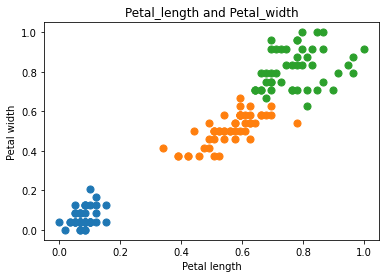

In [227]:
df1 = dataset[dataset.cluster2==0]
df2 = dataset[dataset.cluster2==1]
df3 = dataset[dataset.cluster2==2]

plt.scatter(df1.Petal_length, df1.Petal_width, s=50)
plt.scatter(df2.Petal_length, df2.Petal_width, s=50)
plt.scatter(df3.Petal_length, df3.Petal_width, s=50)

plt.title('Petal_length and Petal_width')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: work with the iris dataset

1. Do clustering with the iris flower dataset to form clusters using as features petal width and length. Drop out the other two features (sepal width and length) for simplicity.


2. Do clustering with the iris flower dataset to form clusters using as features sepal width and length. Drop out the other two features (petal width and length) for simplicity.


3. Do clustering with the iris flower dataset to form clusters using as features sepal and petal width and length. Notice that scatter plots here are not possible


4. For the previous cases: 
    - With and without using min max scaling: determine whether the scaling benefits or not //
    
    
    Puede llegar a beneficiar, pero en este caso debido a los datos que tenemos no causa una gran impresion a los resultados.
    
    
    - Compute and show the elbow plot 



5. Draw conclusiones:
    - About the scalling: does it helps or not? //
   
   
    En esta actividad debido a los datos de Iris no tiene un gran impacto, esto debido a que no se altera de forma notable el clustering.
    
    
    - About the elbow plot: does the K agree with the real number of clusters? // 
    
    Si esto debido a que en la elbow plot se muestra que en el numero 3 se empieza atener un cambio menos impactante con respecto a los clusters, dandonos a entender que con 3 clusters es mas que suficiente para trabajar.
    
    
    - Comparison between (i) sepal features alone, (ii) petal features alone, and (ii) both sepal with petal features: which one is better/worse? Why? // 
    
    La mejor forma es separada por petalos y sepalos (Punto 1 y 2), esto debido a que no es posible hacer el scatter con todas las caracteristicas de las flores(Punto 3), por otro lado es mas facil de visualizar y entender por separado los scatters de los petalos y sepalos.

range(1, 10)
[28.36835321972719, 5.176463590044366, 1.701874688192097, 1.1588792731667128, 0.8538617353912238, 0.6803604930647141, 0.5651273455703979, 0.48580845539143697, 0.4136372577940613]


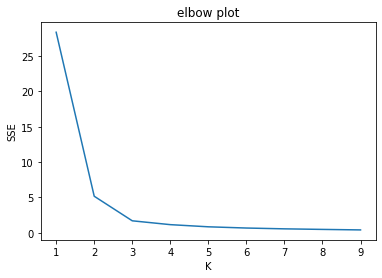

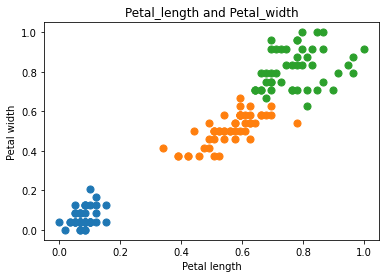

In [228]:
#Punto 1
sse =[]
k_rng=range(1,10)
for k in k_rng:
    km =KMeans(n_clusters=k)
    km.fit_predict(dataset[["Petal_length","Petal_width"]])
    sse.append(km.inertia_)
    
print(k_rng)
print(sse)  

plt.plot(k_rng,sse)

plt.title("elbow plot")
plt.xlabel("K")
plt.ylabel("SSE")

plt.show()

df1 = dataset[dataset.cluster2==0]
df2 = dataset[dataset.cluster2==1]
df3 = dataset[dataset.cluster2==2]

plt.scatter(df1.Petal_length, df1.Petal_width, s=50)
plt.scatter(df2.Petal_length, df2.Petal_width, s=50)
plt.scatter(df3.Petal_length, df3.Petal_width, s=50)

plt.title('Petal_length and Petal_width')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

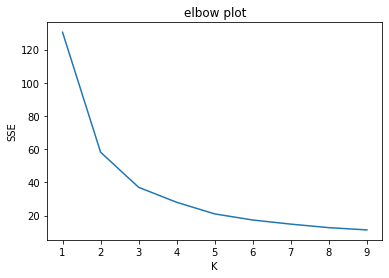

In [229]:
# Punto 2
dataset = pd.read_csv(url, names= ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Class'])
dataset =dataset.dropna()
# Encoding the categorical column
dataset = dataset.replace({"Class":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })
dataset.drop(["Petal_length","Petal_width"],axis='columns',inplace=True)
from sklearn.cluster import KMeans
k = 3
#crear objeto para hacer kmeans y definir el numero de clusters
km= KMeans(n_clusters= k)
#Do kmeans
clusters = km.fit_predict(dataset[["Sepal_length","Sepal_width"]])

dataset["cluster1"]=clusters
km.cluster_centers_

sse =[]
k_rng=range(1,10)
for k in k_rng:
    km =KMeans(n_clusters=k)
    km.fit_predict(dataset[["Sepal_length","Sepal_width"]])
    sse.append(km.inertia_)

plt.plot(k_rng,sse)



plt.title("elbow plot")
plt.xlabel("K")
plt.ylabel("SSE")
plt.show


In [230]:
#Punto 3
dataset = pd.read_csv(url, names= ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Class'])
dataset =dataset.dropna()
# Encoding the categorical column
dataset = dataset.replace({"Class":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

from sklearn.cluster import KMeans
k = 3
#crear objeto para hacer kmeans y definir el numero de clusters
km= KMeans(n_clusters= k)
#Do kmeans
clusters = km.fit_predict(dataset[['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width']])

dataset["cluster1"]=clusters
print(clusters)
print(dataset)
print(km.cluster_centers_)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
     Sepal_length  Sepal_width  Petal_length  Petal_width  Class  cluster1
0             5.1          3.5           1.4          0.2      0         0
1             4.9          3.0           1.4          0.2      0         0
2             4.7          3.2           1.3          0.2      0         0
3             4.6          3.1           1.5          0.2      0         0
4             5.0          3.6           1.4          0.2      0         0
..            ...          ...           ...          ...    ...       ...
145           6.7          3.0           5.2          2.3      2         2
146           6.3          2.5           5.0          1.9      2         1
147           6.5  

In [231]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(dataset[['Sepal_length']])
dataset['Sepal_length'] = scaler.transform(dataset[['Sepal_length']])

scaler.fit(dataset[['Sepal_width']])
dataset['Sepal_width'] = scaler.transform(dataset[['Sepal_width']])

scaler.fit(dataset[['Petal_length']])
dataset['Petal_length'] = scaler.transform(dataset[['Petal_length']])

scaler.fit(dataset[['Petal_width']])
dataset['Petal_width'] = scaler.transform(dataset[['Petal_width']])

dataset

,Sepal_length,Sepal_width,Petal_length,Petal_width,Class,cluster1
0,0.222222,0.625000,0.067797,0.041667,0,0
1,0.166667,0.416667,0.067797,0.041667,0,0
2,0.111111,0.500000,0.050847,0.041667,0,0
3,0.083333,0.458333,0.084746,0.041667,0,0
4,0.194444,0.666667,0.067797,0.041667,0,0
...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2,2
146,0.555556,0.208333,0.677966,0.750000,2,1
147,0.611111,0.416667,0.711864,0.791667,2,2
148,0.527778,0.583333,0.745763,0.916667,2,2


In [232]:
dataset.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Class,cluster1
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056,1.000000,0.920000
std,0.230018,0.181611,0.299203,0.317599,0.819232,0.764304
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333,0.000000,0.000000
50%,0.416667,0.416667,0.567797,0.500000,1.000000,1.000000
75%,0.583333,0.541667,0.694915,0.708333,2.000000,1.750000
max,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000


<function matplotlib.pyplot.show(close=None, block=None)>

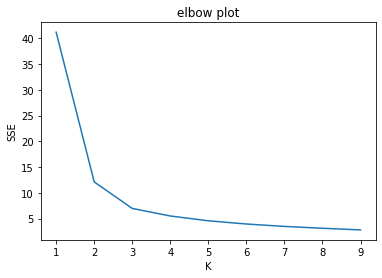

In [233]:
#Punto 4 parte 2
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset[['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width']])
    sse.append(km.inertia_)
    
plt.plot(k_rng,sse)



plt.title("elbow plot")
plt.xlabel("K")
plt.ylabel("SSE")
plt.show